# Exploratory Data Analysis

This notebook contains EDA on the OU learning analytics dataset. 
* The dataset is available at https://analyse.kmi.open.ac.uk/open_dataset
* The data has been processed as described in the notebook: [data_02_preparation_code_narrative.ipynb](data_02_preparation_code_narrative.ipynb)
* No `prediction_point` has been set - including as many rows as possible, as per preprocessing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load preprocessed data from csv file
ou_student = pd.read_csv('../data/final_model_ALL_20230525.csv')

## Size and Shape of the Dataset

In [4]:
# first few rows of the data
ou_student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,submission_distance,stu_activity_count,stu_activity_type_count,stu_total_clicks,stu_days_active,mod_pres_vle_type_count,year,month,subject,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,265.0,196.0,6.0,934.0,40.0,9.0,2013,Oct,SocSci,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,265.0,430.0,7.0,1435.0,80.0,9.0,2013,Oct,SocSci,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,76.0,6.0,281.0,12.0,9.0,2013,Oct,SocSci,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,265.0,663.0,8.0,2158.0,123.0,9.0,2013,Oct,SocSci,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,265.0,352.0,7.0,1034.0,70.0,9.0,2013,Oct,SocSci,Pass


In [5]:

# number of rows and columns
print(" Number of rows: ",ou_student.shape[0],"\n","Number of columns: ", ou_student.shape[1])


 Number of rows:  31437 
 Number of columns:  26


In [6]:
# numerical summary of the data
print(ou_student.describe())


         id_student  num_of_prev_attempts  studied_credits  course_length   
count  3.143700e+04          31437.000000     31437.000000   31437.000000  \
mean   7.064173e+05              0.164424        79.721984     256.015650   
std    5.497398e+05              0.482322        41.022786      13.177689   
min    3.733000e+03              0.000000        30.000000     234.000000   
25%    5.075230e+05              0.000000        60.000000     241.000000   
50%    5.897680e+05              0.000000        60.000000     262.000000   
75%    6.441010e+05              0.000000       120.000000     268.000000   
max    2.698591e+06              6.000000       655.000000     269.000000   

       date_registration  date_unregistration  prop_submissions     avg_score   
count       31437.000000         31437.000000      31437.000000  31437.000000  \
mean          -69.831981           191.815281          0.534951     40.171405   
std            49.199856           106.438016          0.385368

In [7]:
# dataframe information
ou_student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code_module              31437 non-null  object 
 1   code_presentation        31437 non-null  object 
 2   id_student               31437 non-null  int64  
 3   gender                   31437 non-null  object 
 4   region                   31437 non-null  object 
 5   highest_education        31437 non-null  object 
 6   imd_band                 31437 non-null  object 
 7   age_band                 31437 non-null  object 
 8   num_of_prev_attempts     31437 non-null  int64  
 9   studied_credits          31437 non-null  int64  
 10  disability               31437 non-null  object 
 11  course_length            31437 non-null  int64  
 12  date_registration        31437 non-null  float64
 13  date_unregistration      31437 non-null  float64
 14  prop_submissions      

In [8]:
# data types of columns
column_types = ou_student.dtypes

# count the data types
type_counts = column_types.value_counts()

print(type_counts)

object     11
float64    10
int64       5
Name: count, dtype: int64


### Curriculum

In [9]:
# curriculum

# modules in the dataset
print('There are',len(ou_student.code_module.unique()),'modules in the dataset.\n')

# modules and their associated subjects
for module in ou_student['code_module'].unique():
    subject = ou_student.loc[ou_student['code_module'] == module, 'subject'].iloc[0]

    print('Module:', module, '- Subject:', subject)

print('\n')

# intake months in the dataset
print('There are',len(ou_student.month.unique()),'intakes in the dataset.\n')

# intake months for each module
for module in ou_student['code_module'].unique():
    month = ou_student.loc[ou_student['code_module'] == module, 'month'].unique()
    print('Module:', module, '- Intake:', ', '.join(month))

print('\n')
print('There are',len(ou_student.year.unique()),'years in the dataset.\n')

# intake year for each module
for module in ou_student['code_module'].unique():
    year = ou_student.loc[ou_student['code_module'] == module, 'year'].unique()
    print('Module:', module, '- Subject:', year)



There are 7 modules in the dataset.

Module: AAA - Subject: SocSci
Module: BBB - Subject: SocSci
Module: CCC - Subject: Stem
Module: DDD - Subject: Stem
Module: EEE - Subject: Stem
Module: FFF - Subject: Stem
Module: GGG - Subject: SocSci


There are 2 intakes in the dataset.

Module: AAA - Intake: Oct
Module: BBB - Intake: Feb, Oct
Module: CCC - Intake: Feb, Oct
Module: DDD - Intake: Feb, Oct
Module: EEE - Intake: Oct, Feb
Module: FFF - Intake: Feb, Oct
Module: GGG - Intake: Oct, Feb


There are 2 years in the dataset.

Module: AAA - Subject: [2013 2014]
Module: BBB - Subject: [2013 2014]
Module: CCC - Subject: [2014]
Module: DDD - Subject: [2013 2014]
Module: EEE - Subject: [2013 2014]
Module: FFF - Subject: [2013 2014]
Module: GGG - Subject: [2013 2014]


### Students

In [10]:
# number of students
print('There are',len(ou_student.id_student.unique()),'students in the dataset with a total of',len(ou_student),'registrations.')


There are 27784 students in the dataset with a total of 31437 registrations.


## Distributions



### Overall by Outcome

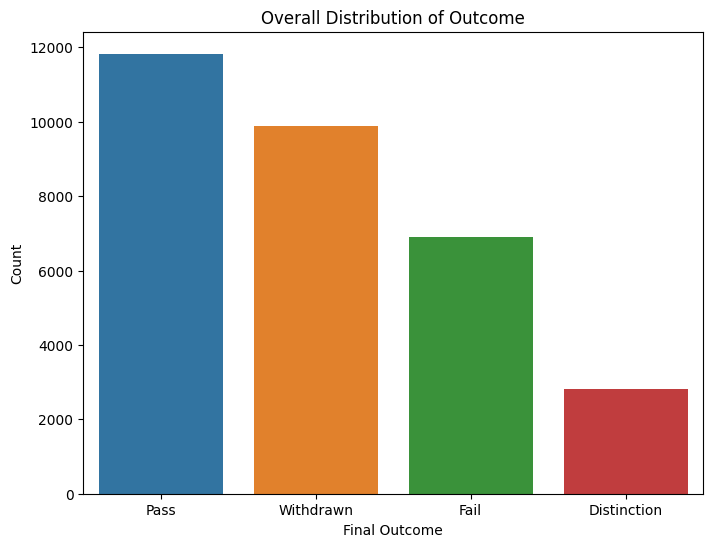

In [11]:
# overall distribution of 'final_result'
plt.figure(figsize=(8, 6))
sns.countplot(data=ou_student, x='final_result')
plt.title('Overall Distribution of Outcome')
plt.xlabel('Final Outcome')
plt.ylabel('Count')
plt.show()


### Distribution of Outcomes by Student Characteristics

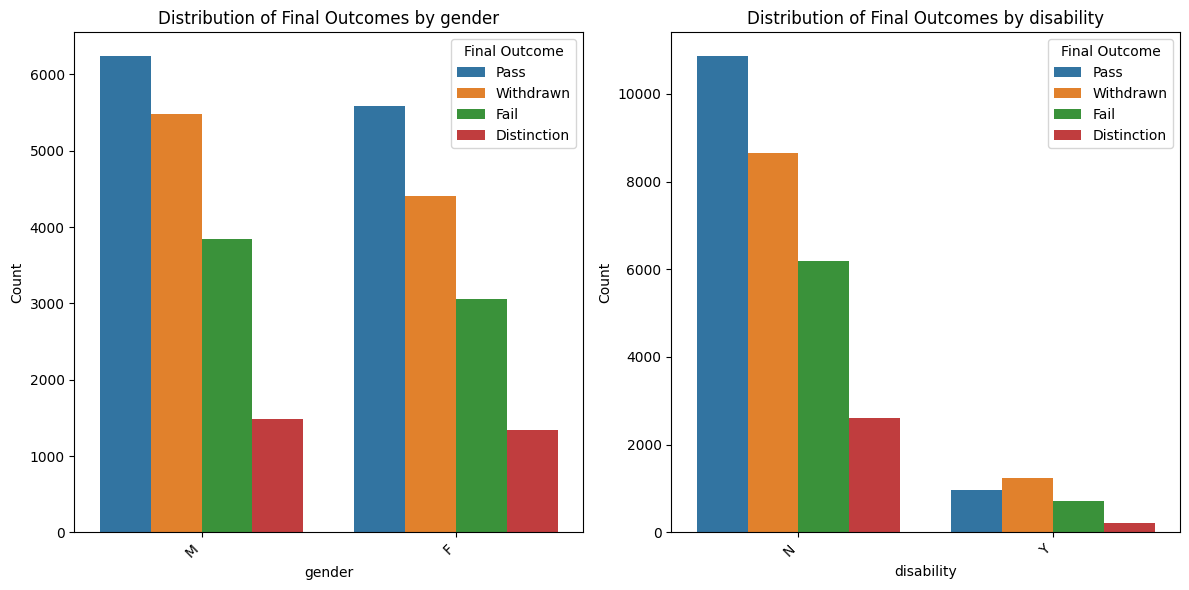

In [12]:

# demographics to plot
demographics = ['gender', 'disability']

# rows and columns for the subplot grid
n_rows = 1
n_cols = 2

# new figure 
plt.figure(figsize=(12, 6))

# iterate over the demographics
for i, demographic in enumerate(demographics):
    # calculate the subplot index
    subplot_idx = i + 1
    
    # create the subplot
    plt.subplot(n_rows, n_cols, subplot_idx)
    
    # plot the countplot for the current demographic
    sns.countplot(data=ou_student, x=demographic, hue='final_result')
    
    # set the title, labels, and legend
    plt.title(f'Distribution of Final Outcomes by {demographic}')
    plt.xlabel(demographic)
    plt.ylabel('Count')
    plt.legend(title='Final Outcome')
    
    # rotate the x-labels
    plt.xticks(rotation=45, ha='right')

# tight layout
plt.tight_layout()

# show the plots
plt.show()



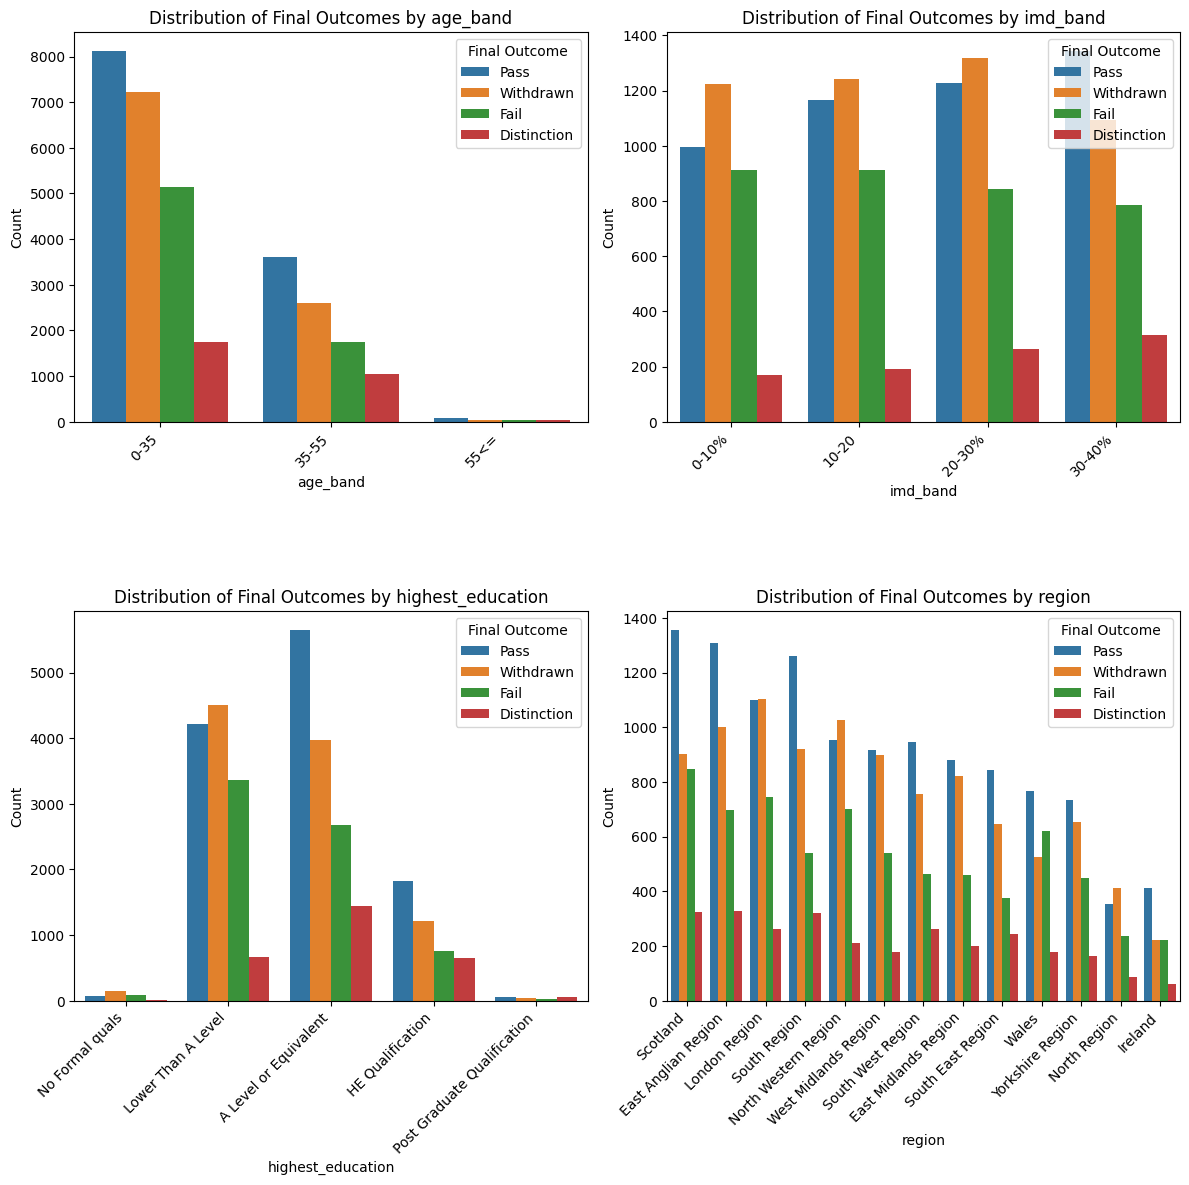

In [13]:

# order for variables
age_band_order = ['0-35', '35-55', '55<=']
imd_band_order = ['0-10%', '10-20', '20-30%', '30-40%']  # data creators left off a % sign
highest_education_order = ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent',
                           'HE Qualification', 'Post Graduate Qualification']
region_order = ou_student['region'].value_counts().index.tolist()

# demographics to plot
demographics = ['age_band', 'imd_band', 'highest_education', 'region']

# rows and columns for the subplot grid
n_rows = 3
n_cols = 2

# calculate the total number of subplots
n_plots = len(demographics)

# calculate the number of required figures
n_figures = int((n_plots - 1) / (n_rows * n_cols)) + 1

# iterate over the figures
for f in range(n_figures):
    # create a new figure
    plt.figure(figsize=(12, 16))
    
    # starting and ending indices for the subplots in the current figure
    start_idx = f * n_rows * n_cols
    end_idx = min((f + 1) * n_rows * n_cols, n_plots)
    
    # iterate over the subplots in the current figure
    for i, demographic in enumerate(demographics[start_idx:end_idx]):
        # calculate the subplot index within the current figure
        subplot_idx = i + 1
        
        # create the subplot
        plt.subplot(n_rows, n_cols, subplot_idx)
        
        # plot the countplot for the current demographic
        if demographic == 'age_band':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=age_band_order)
        elif demographic == 'imd_band':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=imd_band_order)
        elif demographic == 'highest_education':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=highest_education_order)
        elif demographic == 'region':
            sns.countplot(data=ou_student, x=demographic, hue='final_result', order=region_order)
        
        # set the title, labels, and legend
        plt.title(f'Distribution of Final Outcomes by {demographic}')
        plt.xlabel(demographic)
        plt.ylabel('Count')
        plt.legend(title='Final Outcome')
        
        # rotate the x-labels
        plt.xticks(rotation=45, ha='right')
        
    # tight layout
    plt.tight_layout()
    
    # show
    plt.show()



### Distribution of Outcomes by 'Study History'

In [14]:
ou_student.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'course_length', 'date_registration',
       'date_unregistration', 'prop_submissions', 'avg_score',
       'submission_distance', 'stu_activity_count', 'stu_activity_type_count',
       'stu_total_clicks', 'stu_days_active', 'mod_pres_vle_type_count',
       'year', 'month', 'subject', 'final_result'],
      dtype='object')

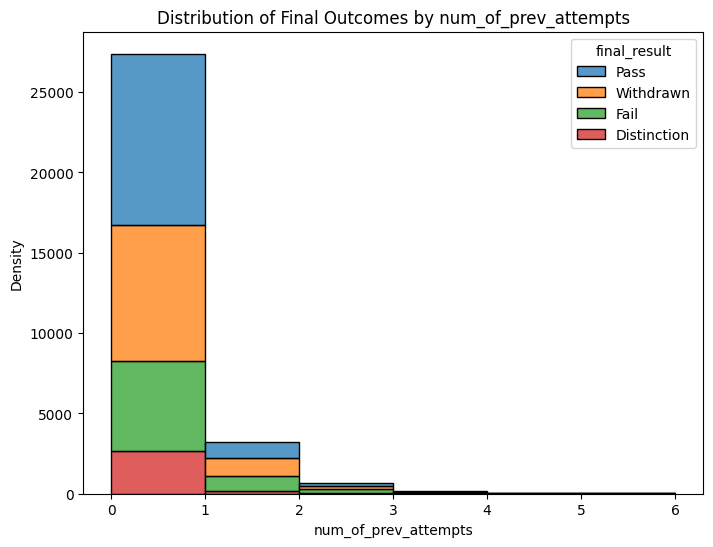

In [15]:
# distributions by study history
history = 'num_of_prev_attempts'

plt.figure(figsize=(8, 6))
sns.histplot(data=ou_student, x=history, hue='final_result', multiple='stack', binwidth=1)
plt.title(f'Distribution of Final Outcomes by {history}')
plt.xlabel(history)
plt.ylabel('Density')
    
plt.show()

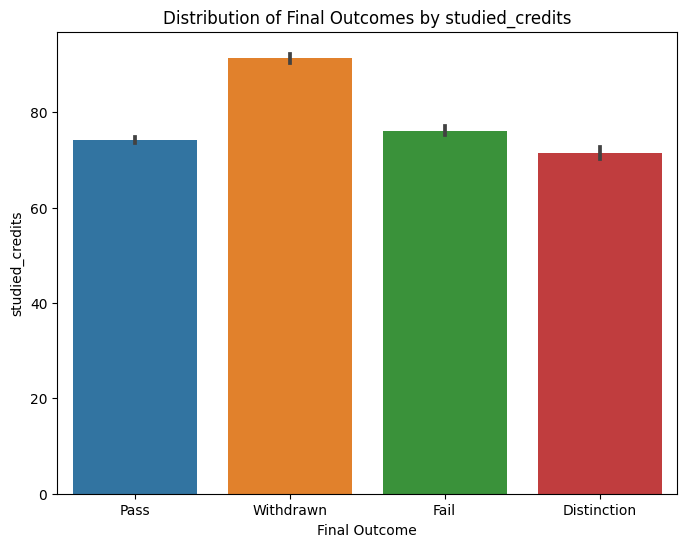

In [16]:
# bar plot for studied_credits
plt.figure(figsize=(8, 6))

sns.barplot(data=ou_student, x='final_result', y='studied_credits')

plt.title('Distribution of Final Outcomes by studied_credits')
plt.xlabel('Final Outcome')
plt.ylabel('studied_credits')

plt.show()


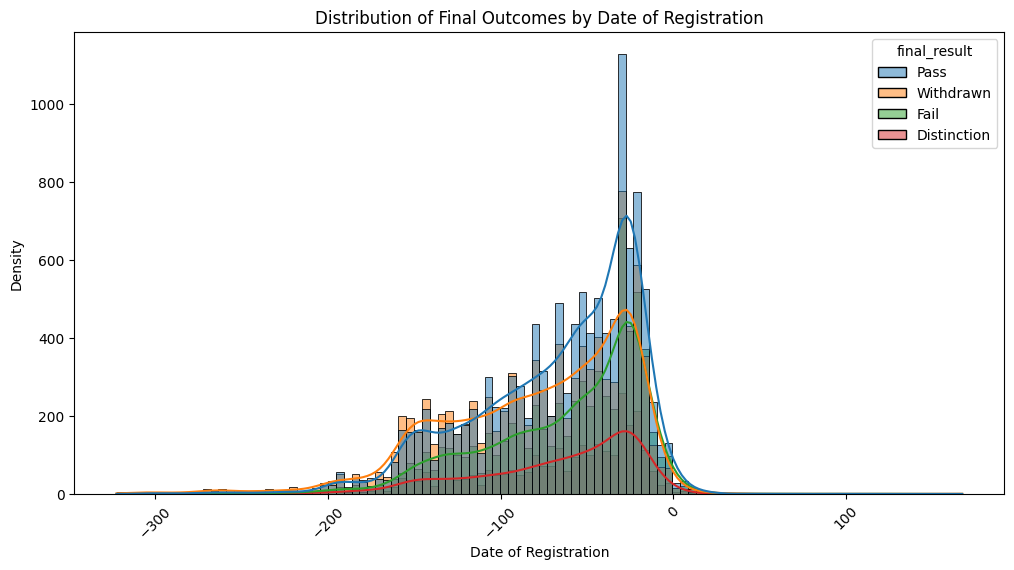

In [17]:

# distributions by date of registration
plt.figure(figsize=(12, 6))
sns.histplot(data=ou_student, x='date_registration', hue='final_result', kde=True)
plt.title('Distribution of Final Outcomes by Date of Registration')
plt.xlabel('Date of Registration')
plt.ylabel('Density')

plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Distribution of Registrations')

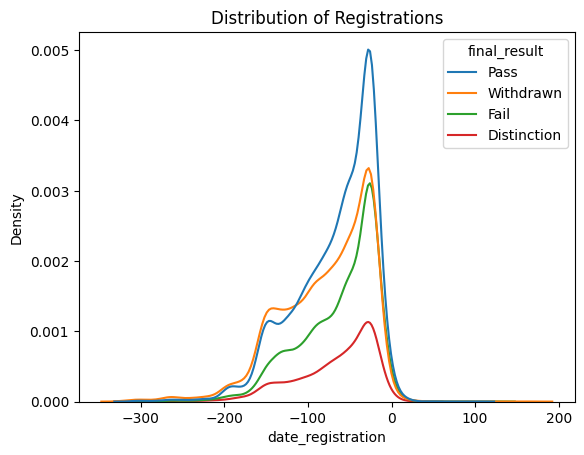

In [18]:
sns.kdeplot(data=ou_student, 
            x='date_registration', 
            hue = 'final_result').set_title('Distribution of Registrations')

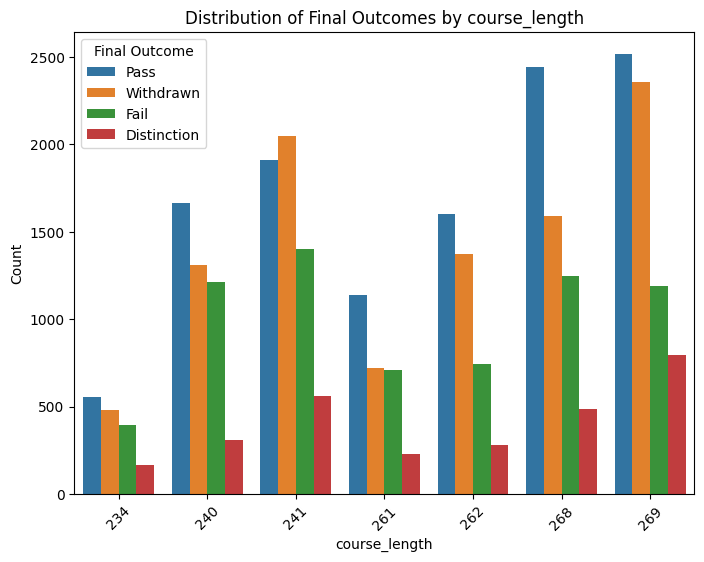

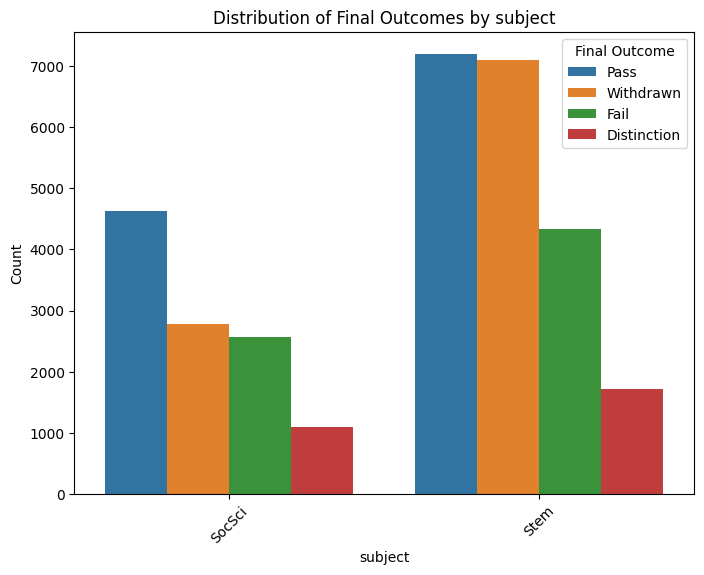

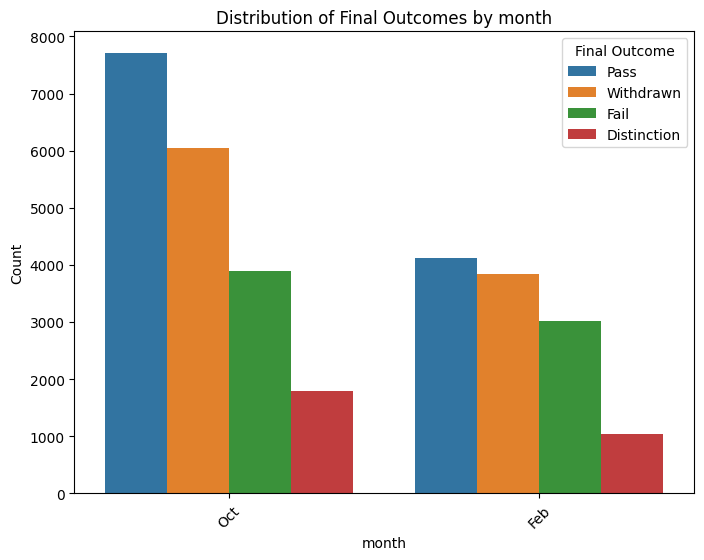

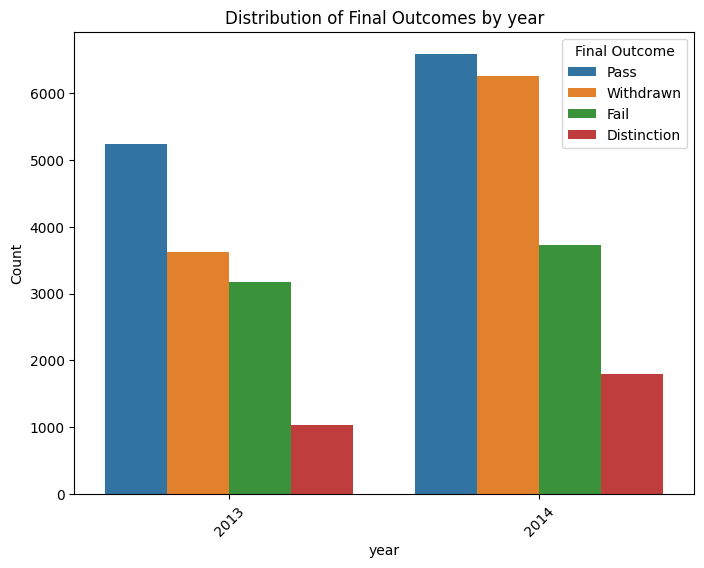

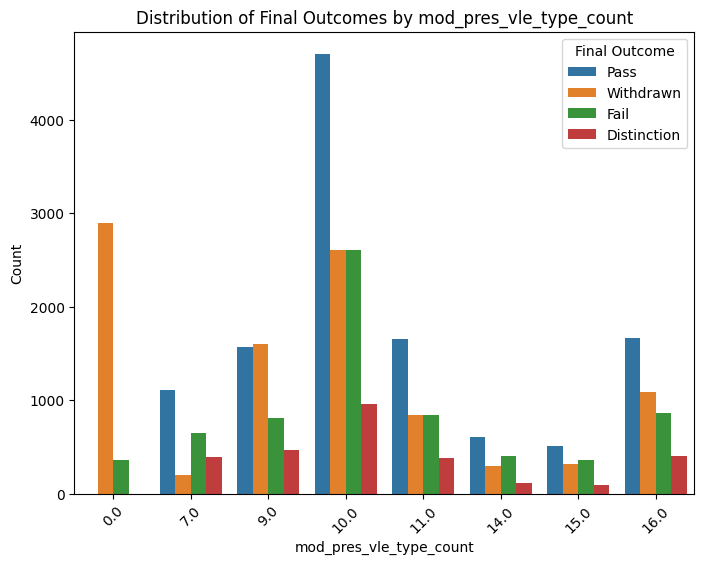

In [19]:

#  distributions by curriculum
curriculum = ['course_length', 'subject', 'month', 'year', 'mod_pres_vle_type_count']
for cur in curriculum:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=ou_student, x=cur, hue='final_result')
    plt.title(f'Distribution of Final Outcomes by {cur}')
    plt.xlabel(cur)
    plt.ylabel('Count')
    plt.legend(title='Final Outcome')
    plt.xticks(rotation=45)
    plt.show()


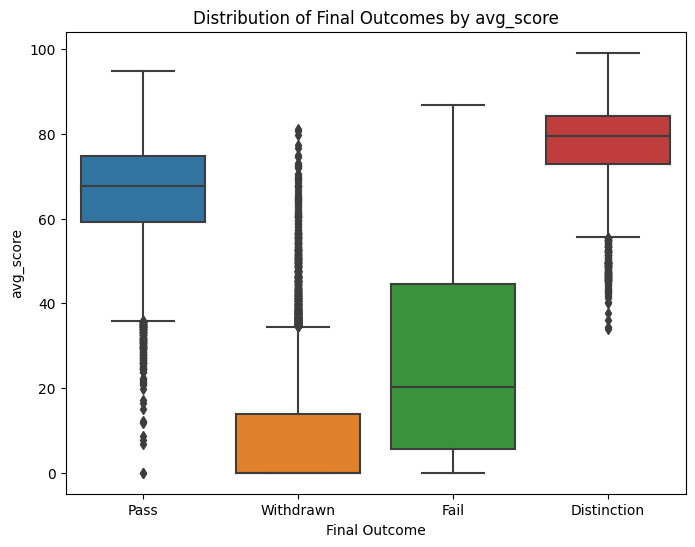

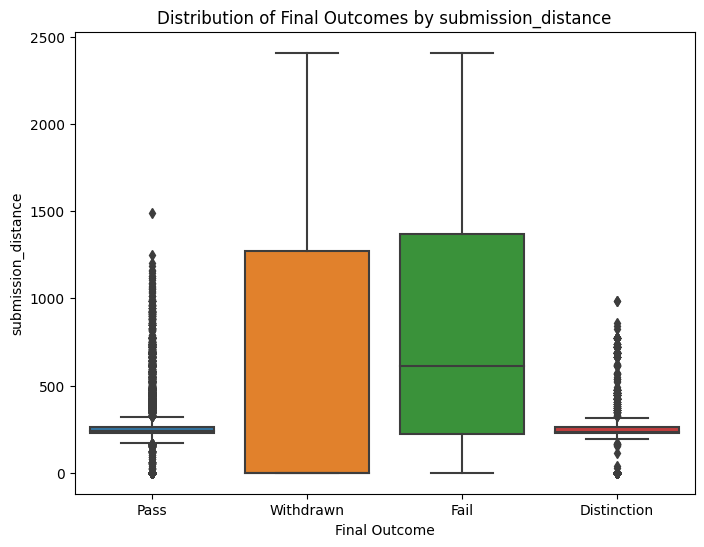

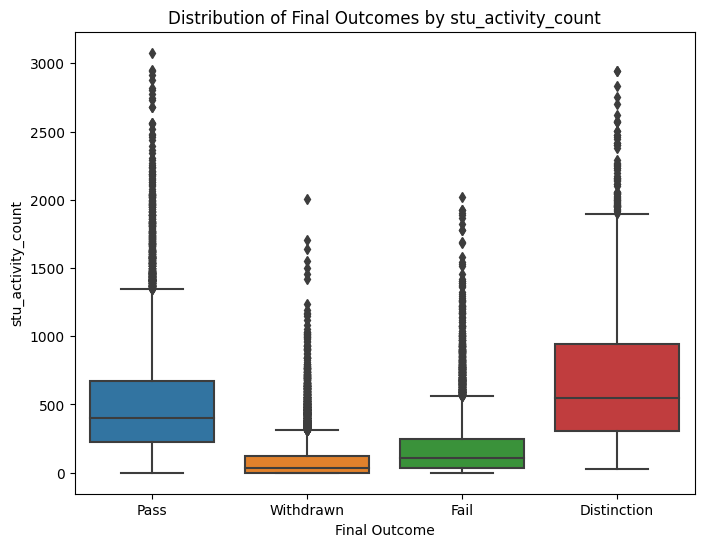

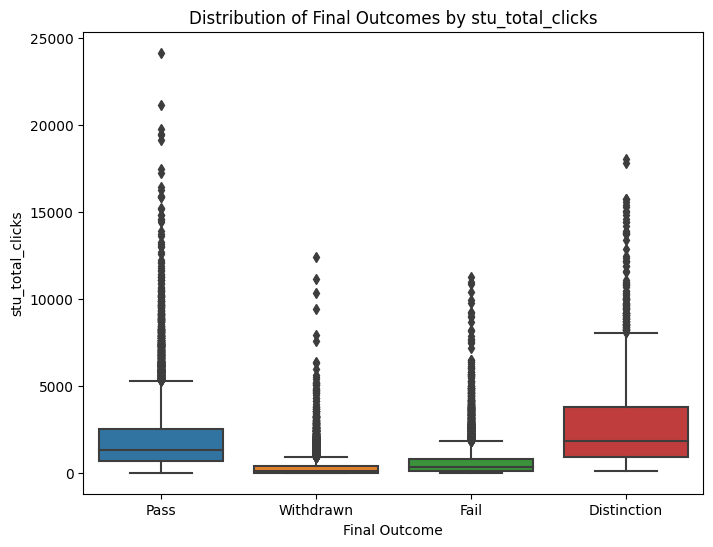

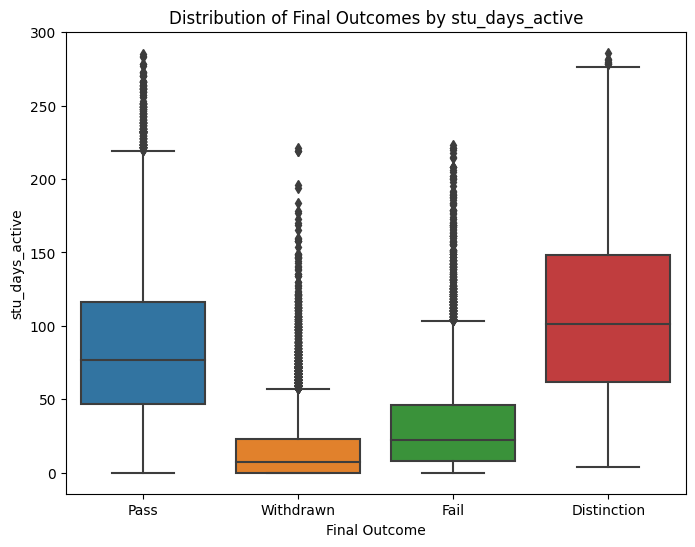

In [20]:

# distributions by academic behavior (learning analytics)
behavior = ['avg_score', 'submission_distance', 'stu_activity_count', 'stu_total_clicks', 'stu_days_active']
for beh in behavior:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=ou_student, x='final_result', y=beh)
    plt.title(f'Distribution of Final Outcomes by {beh}')
    plt.xlabel('Final Outcome')
    plt.ylabel(beh)
    plt.show()

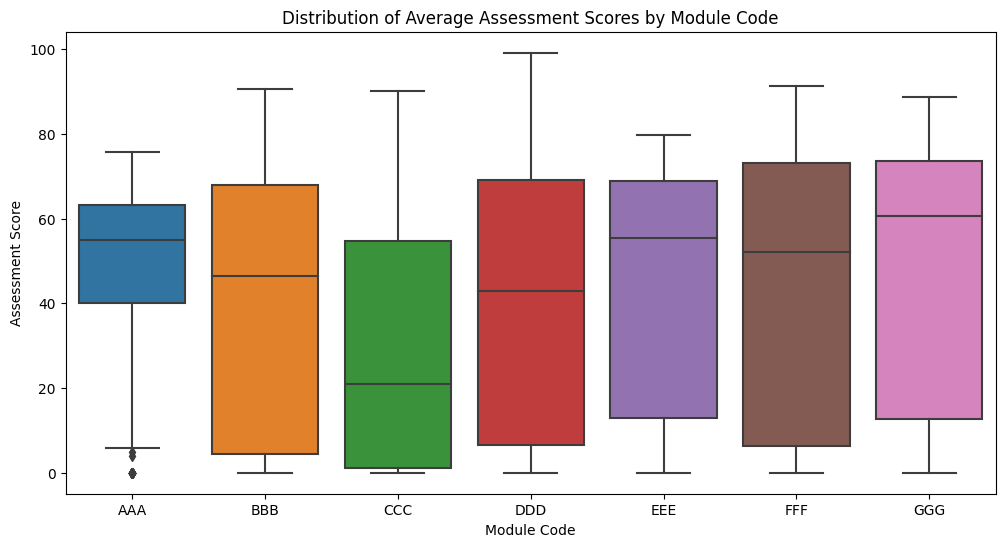

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ou_student, x='code_module', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Module Code')
plt.xlabel('Module Code')
plt.ylabel('Assessment Score')
plt.show()


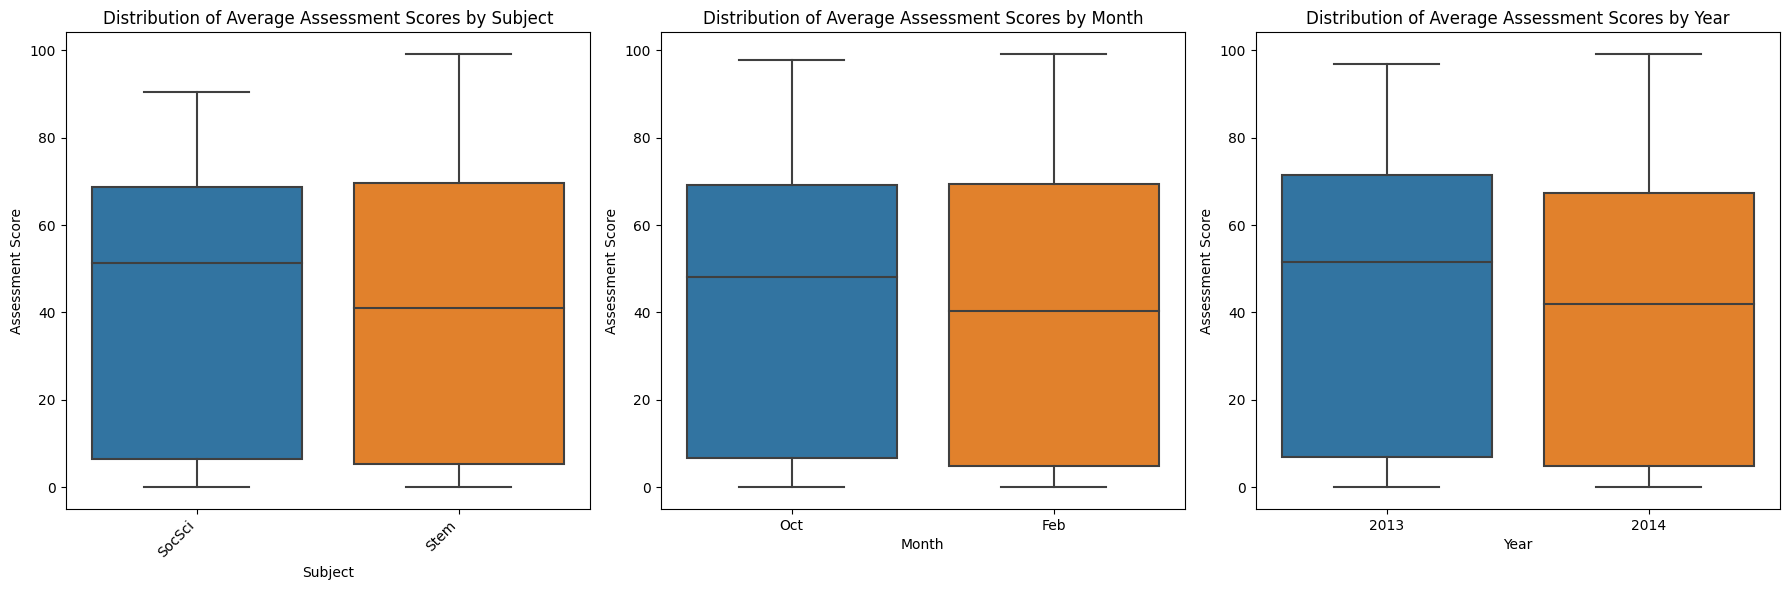

In [22]:
plt.figure(figsize=(18, 6))

# Plot 1: Distribution of Average Assessment Scores by Subject
plt.subplot(1, 3, 1)
sns.boxplot(data=ou_student, x='subject', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Assessment Score')
plt.xticks(rotation=45, ha='right')

# Plot 2: Distribution of Average Assessment Scores by Month
plt.subplot(1, 3, 2)
sns.boxplot(data=ou_student, x='month', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Assessment Score')

# Plot 3: Distribution of Average Assessment Scores by Year
plt.subplot(1, 3, 3)
sns.boxplot(data=ou_student, x='year', y='avg_score')
plt.title('Distribution of Average Assessment Scores by Year')
plt.xlabel('Year')
plt.ylabel('Assessment Score')

plt.tight_layout()
plt.show()




<Figure size 1800x600 with 0 Axes>

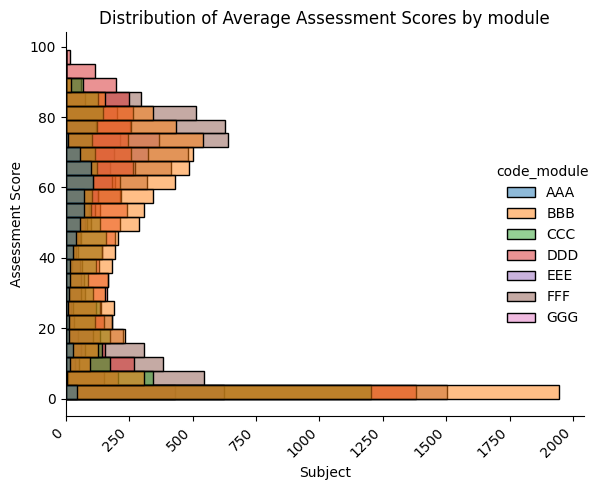

In [34]:
plt.figure(figsize=(18, 6))

# Plot 1: Distribution of Average Assessment Scores by Subject

sns.displot(data=ou_student,  y='avg_score', hue='code_module')
plt.title('Distribution of Average Assessment Scores by module')
plt.xlabel('Subject')
plt.ylabel('Assessment Score')
plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

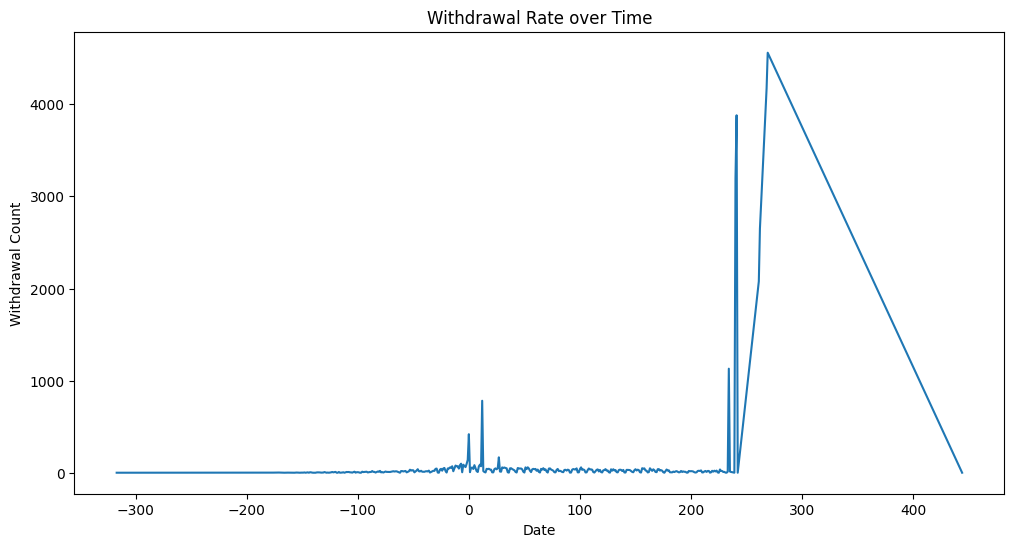

In [ ]:
# withdrawals over time
plt.figure(figsize=(12, 6))
ou_student['date_unregistration'].value_counts().sort_index().plot()
plt.title('Withdrawal Rate over Time')
plt.xlabel('Date')
plt.ylabel('Withdrawal Count')
plt.show()


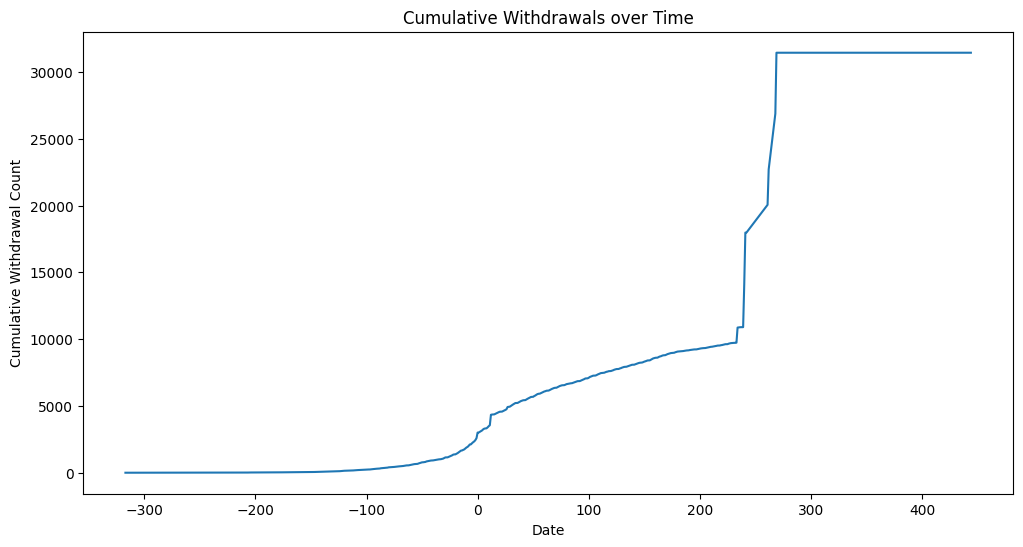

In [ ]:
# cumulative withdrawals over time
plt.figure(figsize=(12, 6))
ou_student['date_unregistration'].value_counts().sort_index().cumsum().plot()
plt.title('Cumulative Withdrawals over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Withdrawal Count')
plt.show()


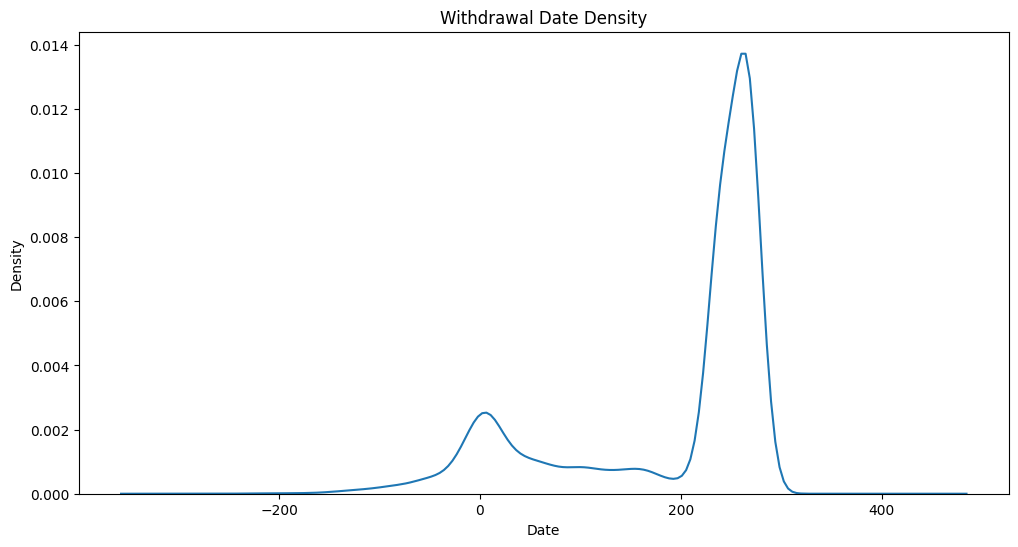

In [ ]:
# withdrawal density
plt.figure(figsize=(12, 6))
sns.kdeplot(data=ou_student, x='date_unregistration')
plt.title('Withdrawal Date Density')
plt.xlabel('Date')
plt.ylabel('Density')
plt.show()


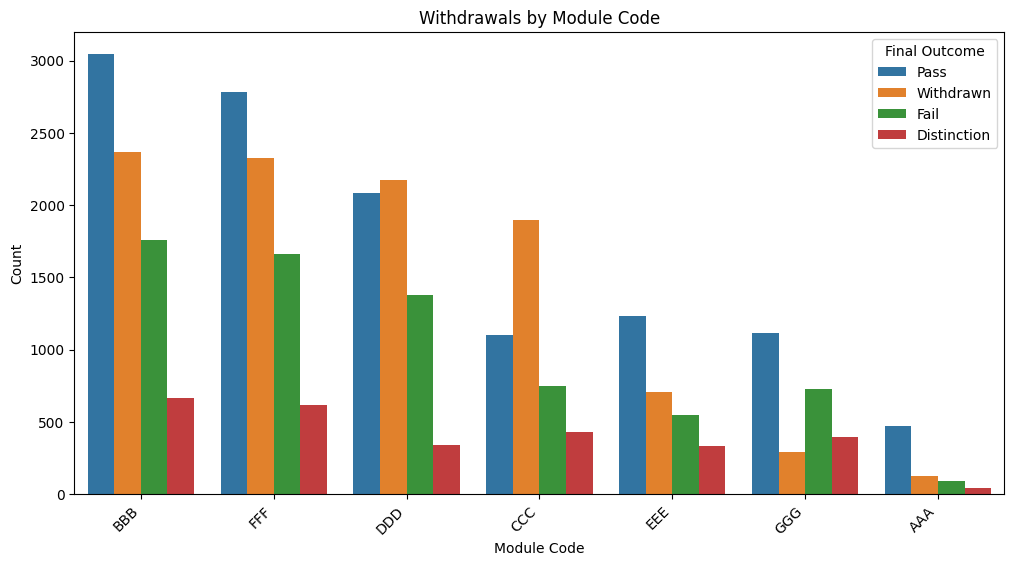

In [ ]:
# withdrawals by module code
plt.figure(figsize=(12, 6))
sns.countplot(data=ou_student, x='code_module', hue='final_result', order=ou_student['code_module'].value_counts().index)
plt.title('Withdrawals by Module Code')
plt.xlabel('Module Code')
plt.ylabel('Count')
plt.legend(title='Final Outcome')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 1.0, 'Distribution of Withdrawal Dates')

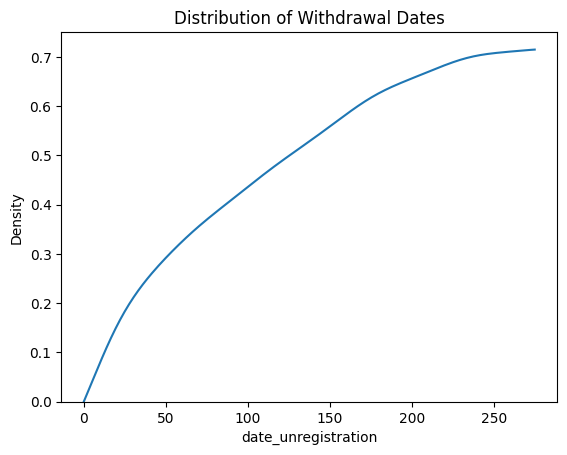

In [ ]:
# kde plot of withdrawals
sns.kdeplot(data=ou_student[ou_student.final_result == 'Withdrawn'], x='date_unregistration', 
            clip = (0,275), cumulative = True).set_title('Distribution of Withdrawal Dates')

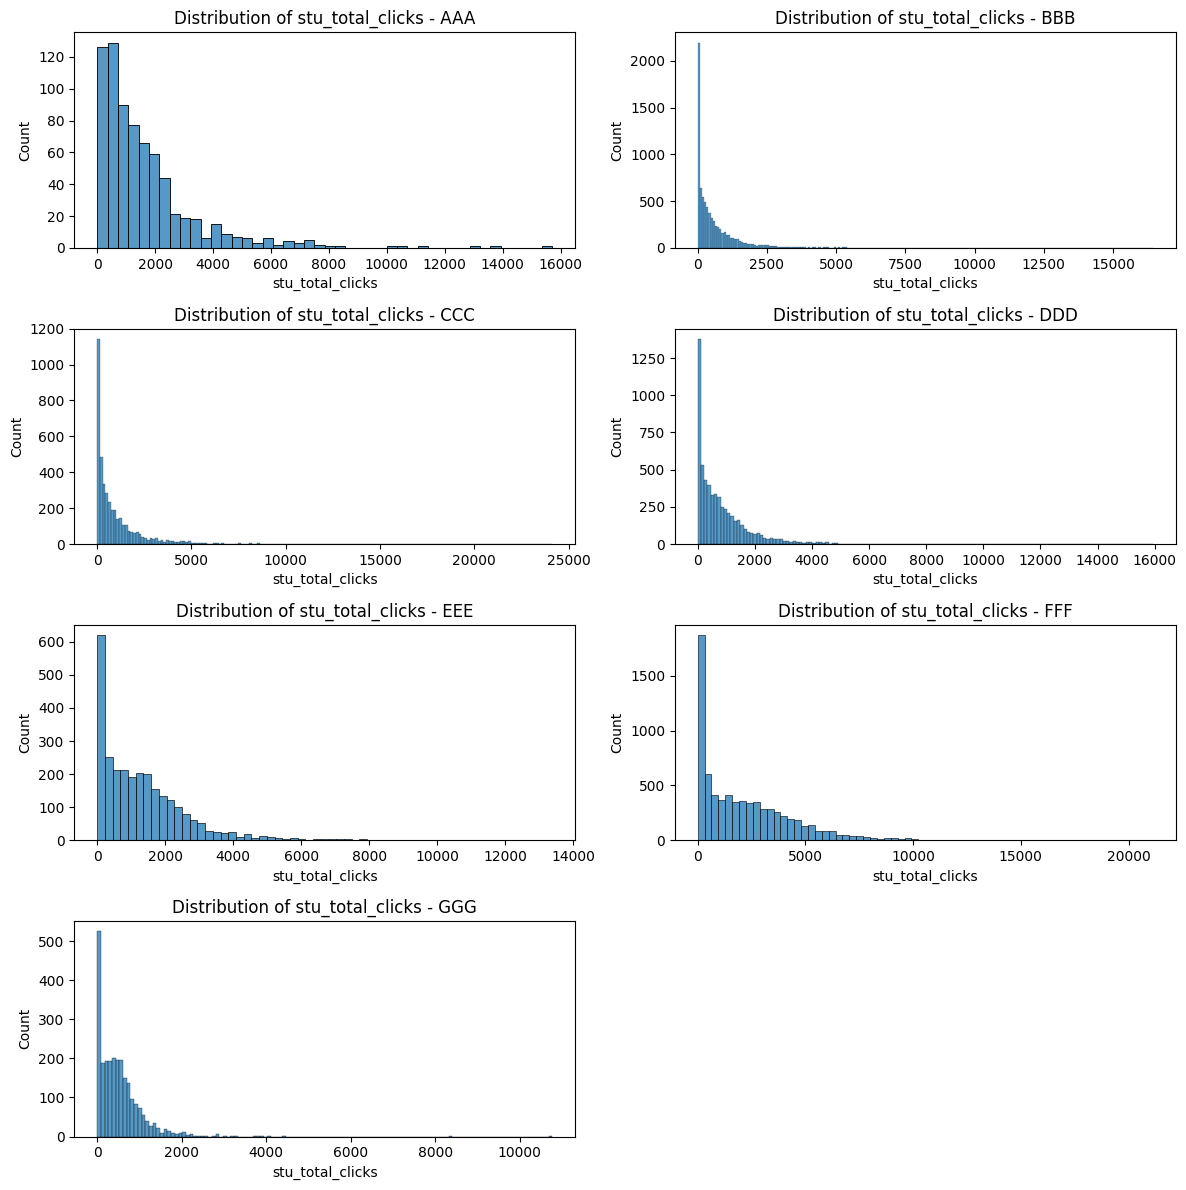

In [ ]:

# unique code_module values
code_modules = ou_student['code_module'].unique()

# number of rows and columns for the subplot grid
n_rows = 4
n_cols = 2

# subplot grid, figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# flatten the axes array for iterating
axes = axes.flatten()

# iterate over the code_modules and plot the distributions
for i, module in enumerate(code_modules):
    # data for the current code_module
    data = ou_student.loc[ou_student['code_module'] == module, 'stu_total_clicks']
    
    # axis for the current subplot
    ax = axes[i]
    
    # distribution for the current code_module
    sns.histplot(data=data, ax=ax)
    
    # title and labels
    ax.set_title(f'Distribution of stu_total_clicks - {module}')
    ax.set_xlabel('stu_total_clicks')
    ax.set_ylabel('Count')

# hide any extra subplots 
if len(code_modules) < len(axes):
    for j in range(len(code_modules), len(axes)):
        axes[j].axis('off')

# tight layout
plt.tight_layout()

# show  
plt.show()

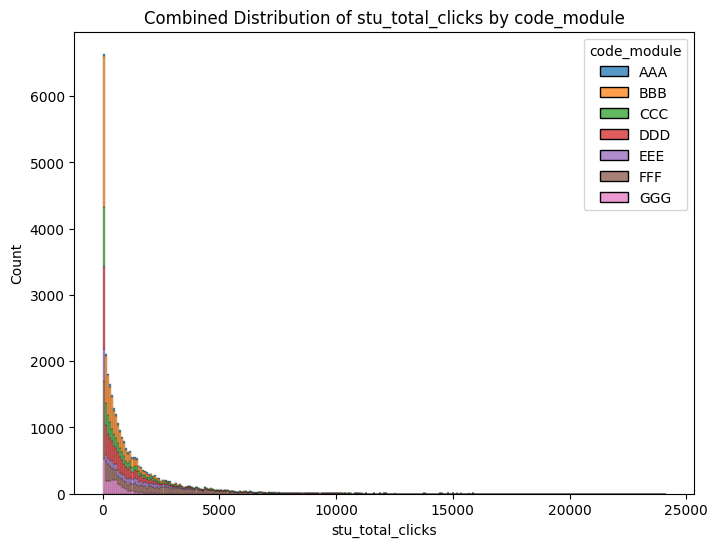

In [ ]:

# combined distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=ou_student, x='stu_total_clicks', hue='code_module', multiple='stack')
plt.title('Combined Distribution of stu_total_clicks by code_module')
plt.xlabel('stu_total_clicks')
plt.ylabel('Count')


# show
plt.show()


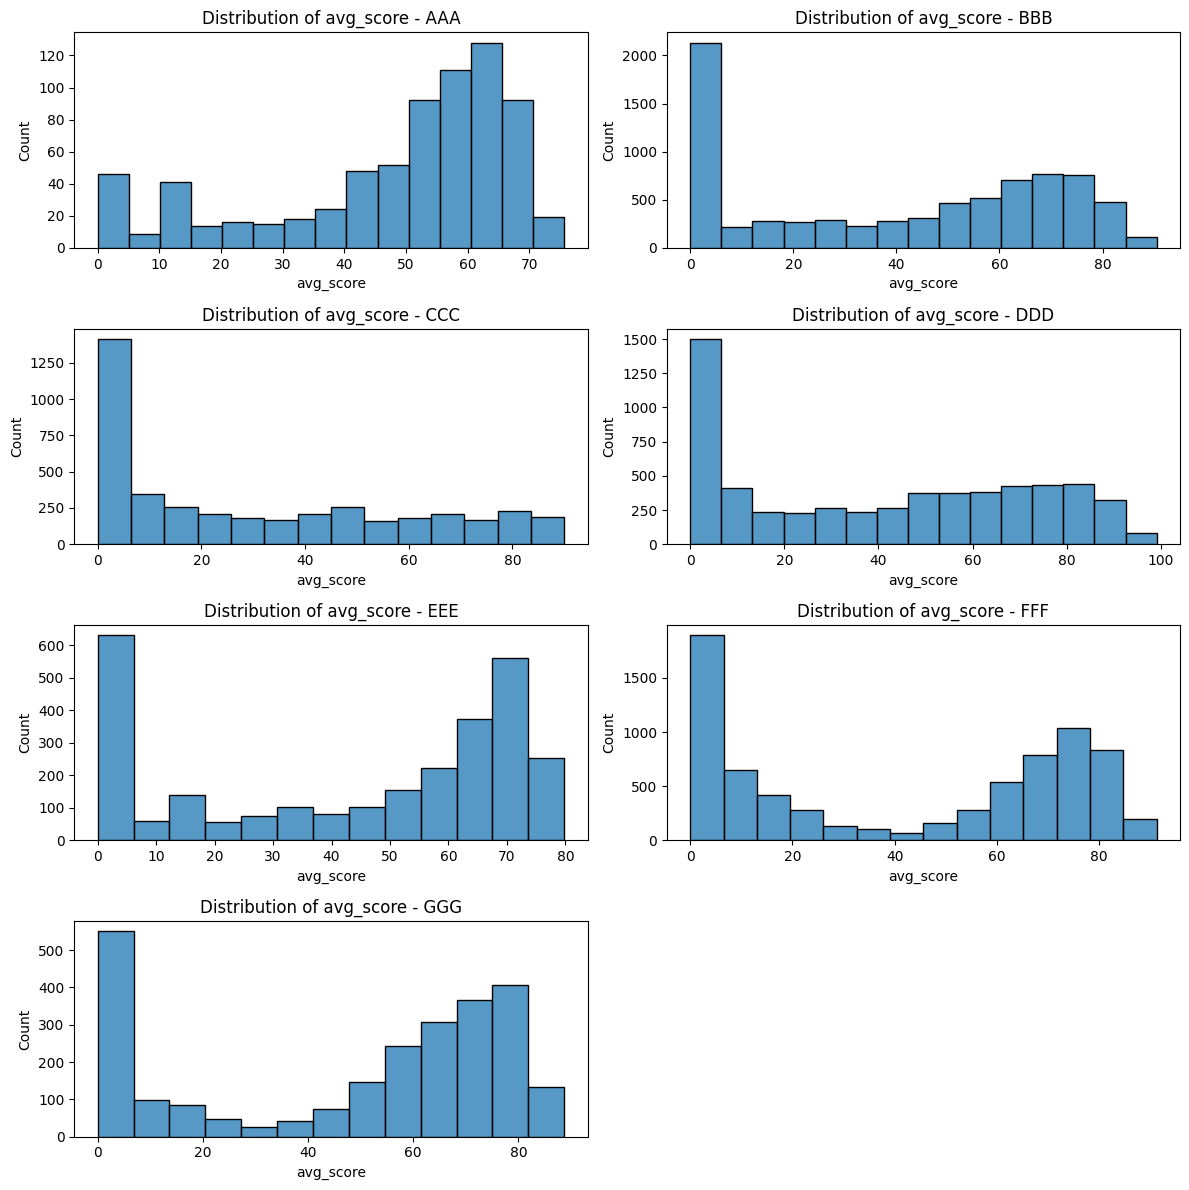

In [35]:

# unique code_module values
code_modules = ou_student['code_module'].unique()

# number of rows and columns for the subplot grid
n_rows = 4
n_cols = 2

# subplot grid, figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# flatten the axes array for iterating
axes = axes.flatten()

# iterate over the code_modules and plot the distributions
for i, module in enumerate(code_modules):
    # data for the current code_module
    data = ou_student.loc[ou_student['code_module'] == module, 'avg_score']
    
    # axis for the current subplot
    ax = axes[i]
    
    # distribution for the current code_module
    sns.histplot(data=data, ax=ax)
    
    # title and labels
    ax.set_title(f'Distribution of avg_score - {module}')
    ax.set_xlabel('avg_score')
    ax.set_ylabel('Count')

# hide any extra subplots 
if len(code_modules) < len(axes):
    for j in range(len(code_modules), len(axes)):
        axes[j].axis('off')

# tight layout
plt.tight_layout()

# show  
plt.show()





Cumulative withdrawals

Withdrawal date density

when is a good time to predict?
Half withdraw by 100 days
Early prediction is useful
 



 

Study days by mod_presentation

 

 

Course completion rate

Course attrition rate

 

I am interested in prediction with course and presentation as predictors.

 

 

Courses by gender – count plot

 



 

Clicks by age group

 

 

 

Scaling…

 

Issues / options

Generalise to non-OU scenarios (module, presentation, etc. differences need to be accounted for and then removed – scale by course, drop variable)

This is not what I am doing – I am looking at predicting within the OU where differences between modules and intakes are important.

So scale whole dataset

 

Question:

When do I split the data – before or after EDA?

Do I need a test, train, validate set?

 

 

Future thoughts:

 

Clustering on H, M, L engagement -> what do these mean?  Do they need to be pre-defined?